In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the dataset

In [31]:
df=pd.read_csv('mpg_raw.csv')

# Summarizing the dataset 

In [32]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [34]:
print(df.shape)
print(df.ndim)

(398, 9)
2


In [35]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [36]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

## checking for the duplicate values

In [37]:
df.duplicated().value_counts()

False    398
Name: count, dtype: int64

## No duplicate values found

## Checking for missing values

In [38]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Handling missing values

In [39]:
df.fillna(df['horsepower'].mean(),inplace=True)

## After Handling missing values

In [40]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [41]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


## Histogram for continous variable

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

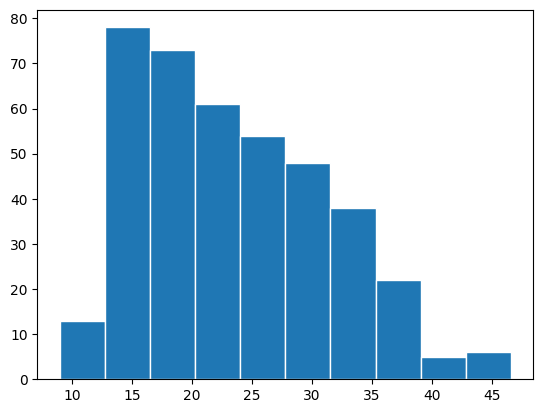

In [42]:
plt.hist(df['mpg'], bins=10, edgecolor='white')

(array([ 27.,  95., 120.,  50.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

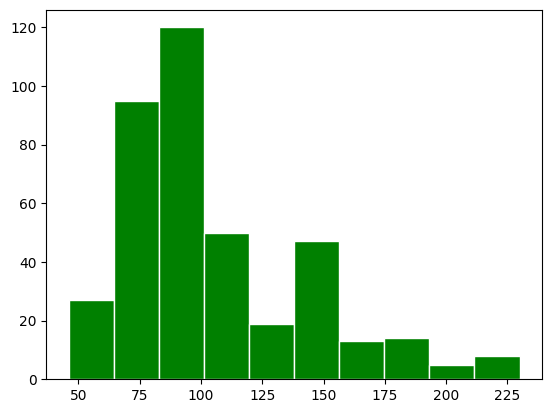

In [43]:
plt.hist(df['horsepower'], bins=10, edgecolor='white',color='green')

## plotting the violin graph 

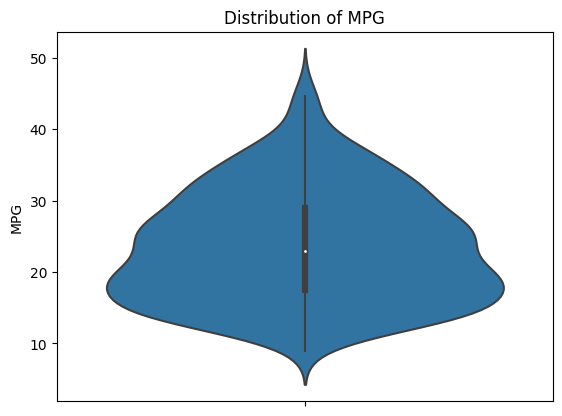

In [44]:
sns.violinplot(y='mpg', data=df)
plt.ylabel('MPG')
plt.title('Distribution of MPG')
plt.show()

In [45]:
df['mpg'].value_counts()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64

## Measure of central tendency for MPG is relied between 15-33

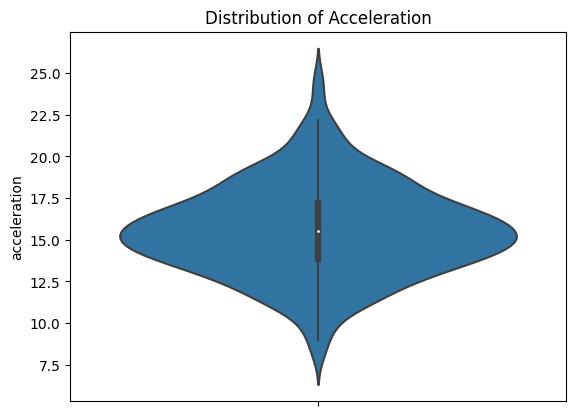

In [46]:
sns.violinplot(y='acceleration', data=df)
plt.ylabel('acceleration')
plt.title('Distribution of Acceleration')
plt.show()

## More number of cars have the accelaration between 12.5 - 18

# Boxplot handling outliers

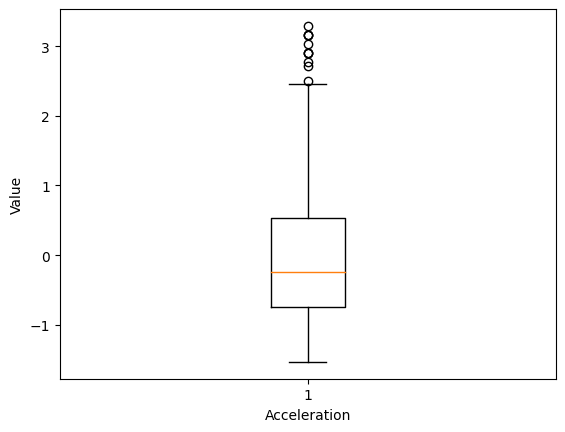

In [52]:
plt.boxplot(df['horsepower'])
plt.xlabel('Acceleration')
plt.ylabel('Value')
plt.show()

In [53]:
z_score=np.abs(df['horsepower']-df['horsepower'].mean()/df['horsepower'].std())

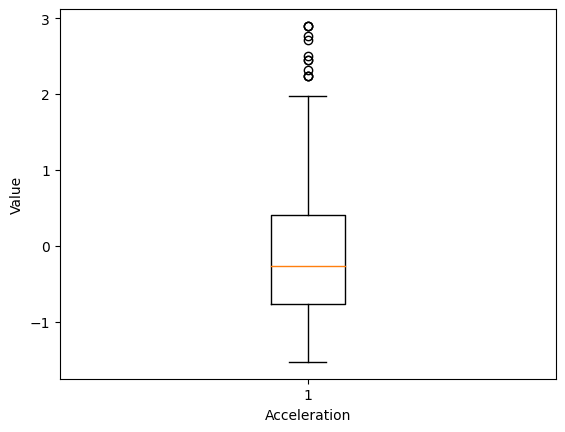

In [54]:
df=df[z_score<=3]
df.reset_index(drop=True,inplace=True)
plt.boxplot(df['horsepower'])
plt.xlabel('Acceleration')
plt.ylabel('Value')
plt.show()

# Heatmap

C:\Users\DS1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\DS1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

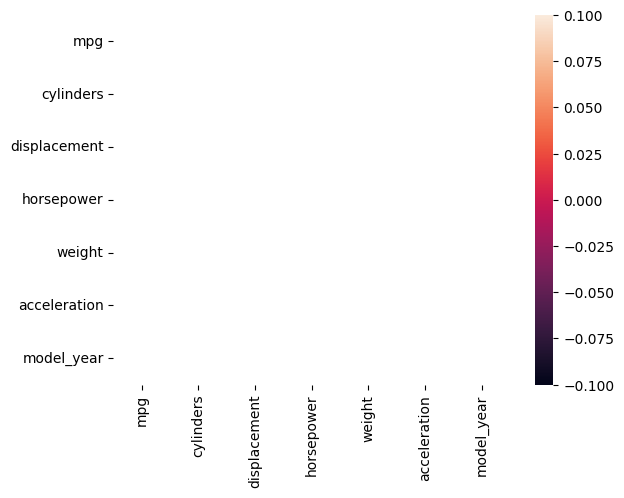

In [29]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)

# Stanardization

In [47]:
continous=df.select_dtypes(include=['float64', 'int64']).columns

In [48]:
continous

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [49]:
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [50]:
from sklearn.preprocessing import StandardScaler
df[continous]=StandardScaler().fit_transform(df[continous])

In [51]:
print(df)

          mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.706439   1.498191      1.090604    0.669196  0.630870     -1.295498   
1   -1.090751   1.498191      1.503514    1.586599  0.854333     -1.477038   
2   -0.706439   1.498191      1.196232    1.193426  0.550470     -1.658577   
3   -0.962647   1.498191      1.061796    1.193426  0.546923     -1.295498   
4   -0.834543   1.498191      1.042591    0.931311  0.565841     -1.840117   
..        ...        ...           ...         ...       ...           ...   
393  0.446497  -0.856321     -0.513026   -0.484111 -0.213324      0.011586   
394  2.624265  -0.856321     -0.925936   -1.375302 -0.993671      3.279296   
395  1.087017  -0.856321     -0.561039   -0.536534 -0.798585     -1.440730   
396  0.574601  -0.856321     -0.705077   -0.667591 -0.408411      1.100822   
397  0.958913  -0.856321     -0.714680   -0.588957 -0.296088      1.391285   

     model_year  origin                       name  
0     -1.6